In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spicy import signal

In [20]:
def read_data(name):
    with open("breath_data" + "\\" + name + ".txt", 'r') as file:
        a = file.read()
    return np.fromstring(a, dtype=int, sep='\n')
def read_data_trans(name):
    with open("breath_data_trans" + "\\" + name + ".txt", 'r') as file:
        a = file.read()
    return a

### s_n là các file tiếng thở (1-15)
### p_n là các file ngưng thở (1-15) trừ 12 ạ vì file 12 bị lỗi

In [236]:
def filter(data,N, Wn, type):    # (ten file, bậc bộ lọc, tần số cắt, loại bộ lọc)
    b, a = signal.butter(N, Wn, analog=False, btype=type, output='ba')
    return signal.filtfilt(b, a, data)
def draw(data):
    color = ['red', 'darkgreen', 'darkblue', 'c', 'm', 'y', 'k', 'w']
    plt.figure(figsize=(20, 5))
    for i in range(0, len(data)):
        plt.plot(data[i], color = color[i]);
        plt.ylim([-250,250])

def lowpass_filter_per_cutoff_freq(name, N, fc): # (ten file, bậc bộ lọc, tần số cắt)
    raw = read_data(name)
    for i in np.array([100, 500, 1000, 1500, 1999]):
        low_data = filter(raw, N , i/fc, 'low')
        draw([raw,low_data]);
        plt.title('Low-pass filter with cut-off freq:' + str(i) +'(Hz)')
        plt.legend(['Raw data', 'Low-pass filter']) 
        plt.show();

def bandpass_filter_per_range_freq(name, N, fc): # (ten file, bậc bộ lọc, tần số cắt)
    raw = read_data(name)
    for i in np.array([10, 100, 500, 1000, 1500, 1999]):
        for j in np.array([100, 500, 1000, 1500, 1999]):
            if i >= j:
                continue
            band_data = filter(raw, N , [i/fc,j/fc], 'band')
            draw([raw,band_data]);
            plt.title('Band-pass filter:' + str(i) +'(Hz)'+'-'+str(j)+'(Hz)')
            plt.legend(['Raw data', 'Band-pass filter']) 
            plt.show();

def preprocessing_data(data_name):
    a = read_data_trans(data_name)
    a = a.split('"')
    for i in range(0, len(a)):
        if len(a[i]) > 0 and a[i][0] != '(':
            a[i] = 0
    a = [x for x in a if x != 0]
    for i in range(len(a)):
        a[i] = a[i].replace('(0x) ', '')
    hex_array_data = []
    for i in range(len(a)):
        hex_array_data = np.concatenate([hex_array_data, a[i].split('-')])
    decimal_array = [int(hex_value, 16) for hex_value in hex_array_data]
    return decimal_array

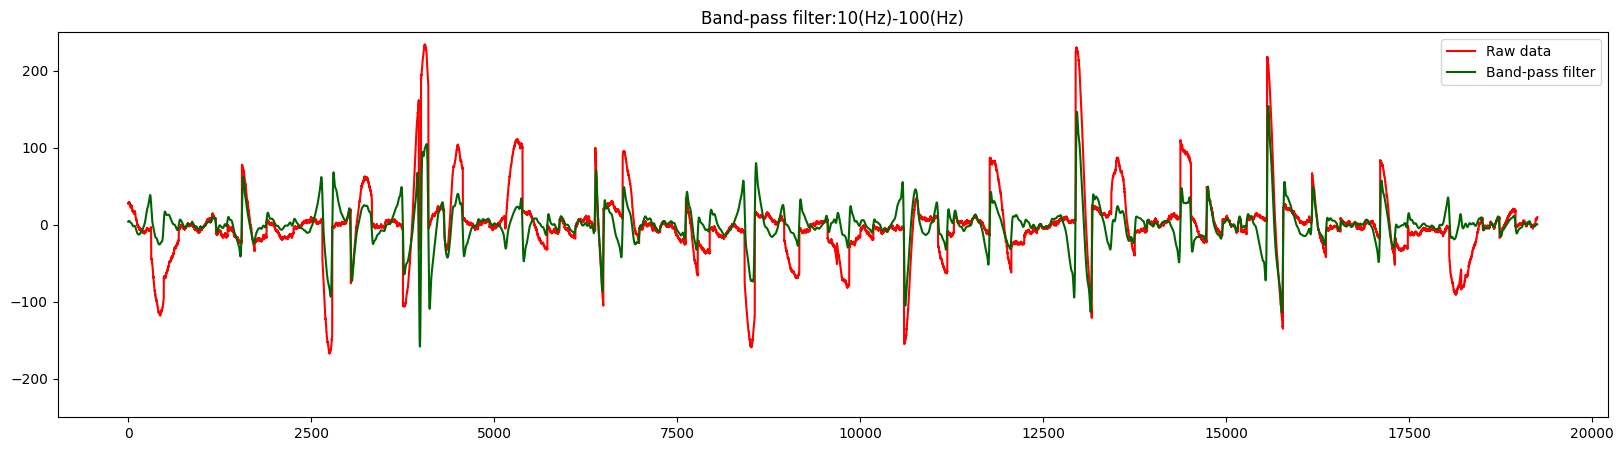

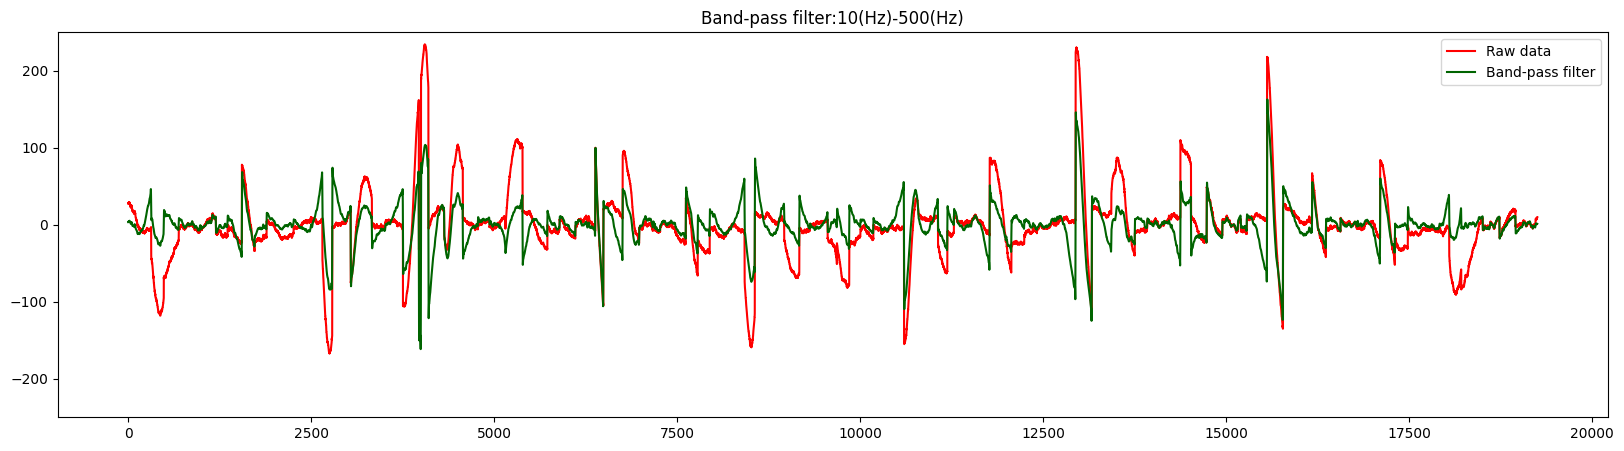

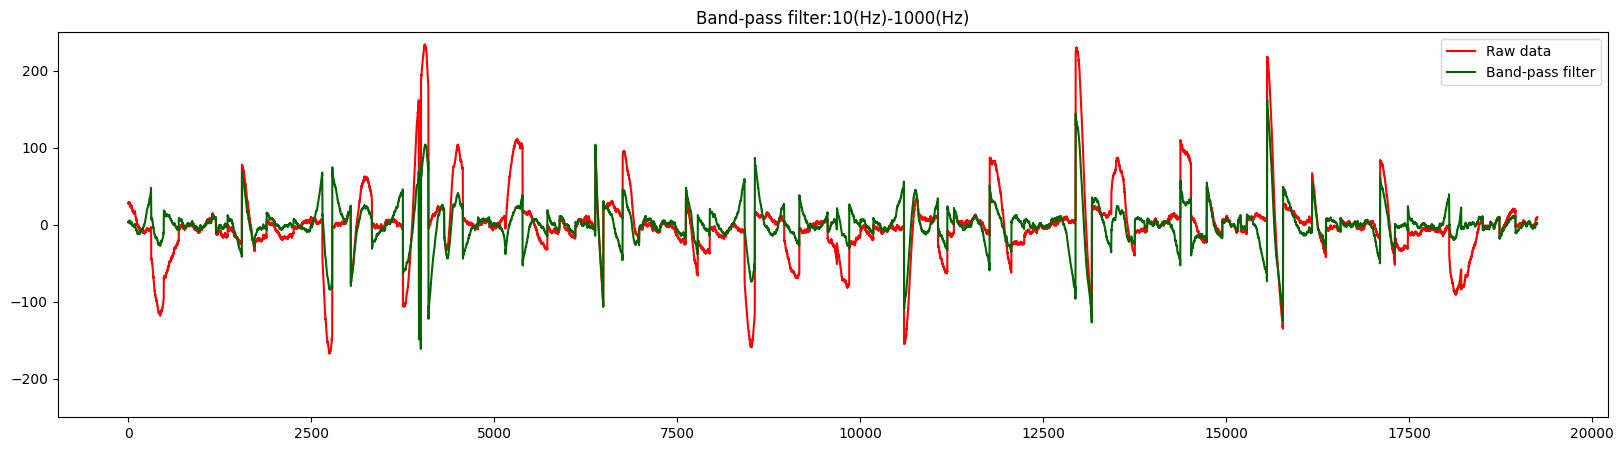

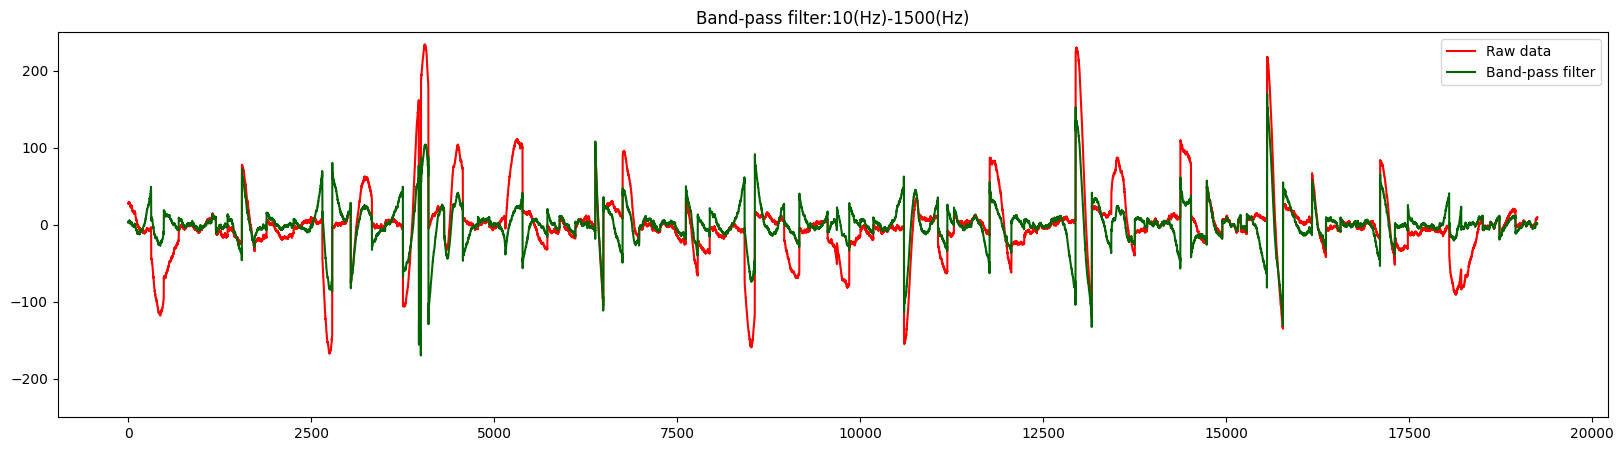

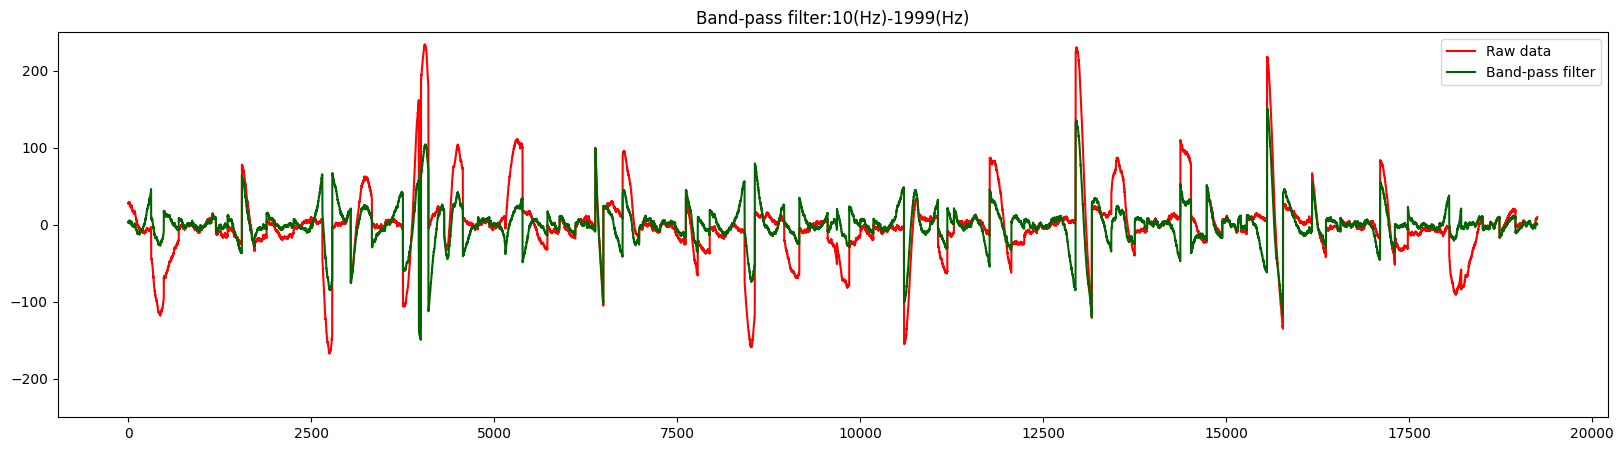

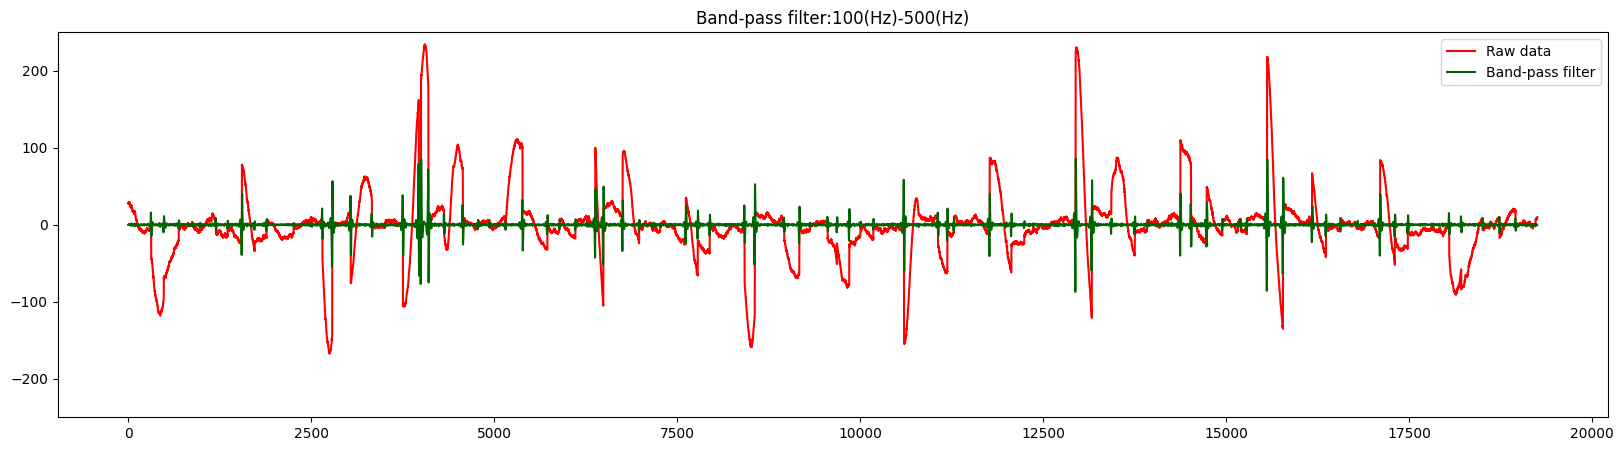

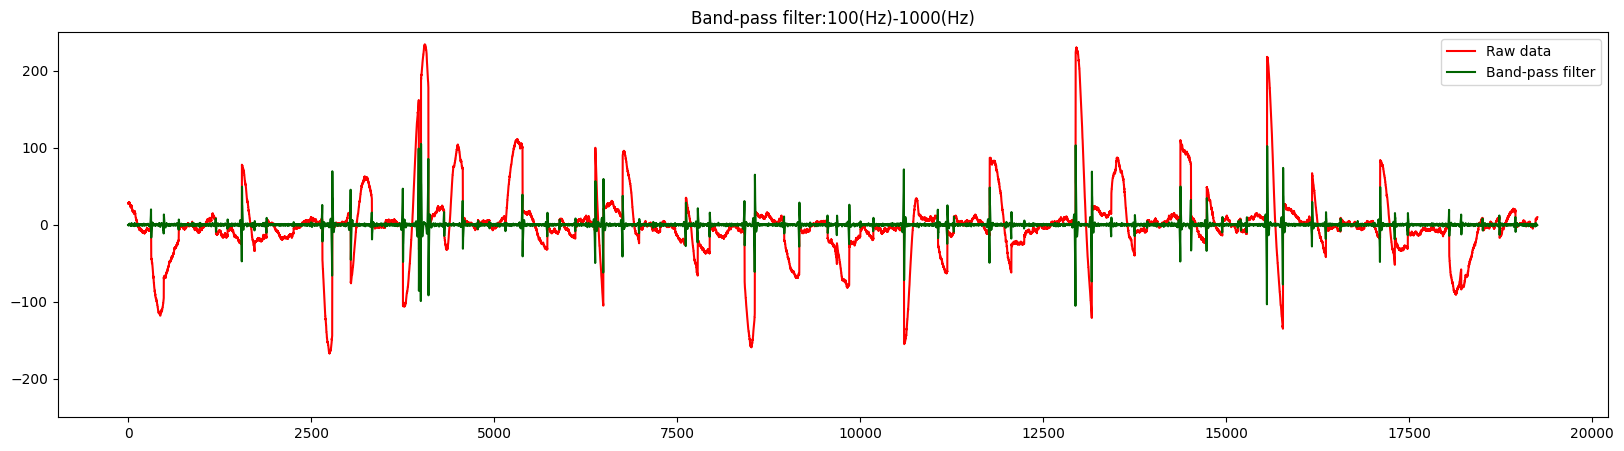

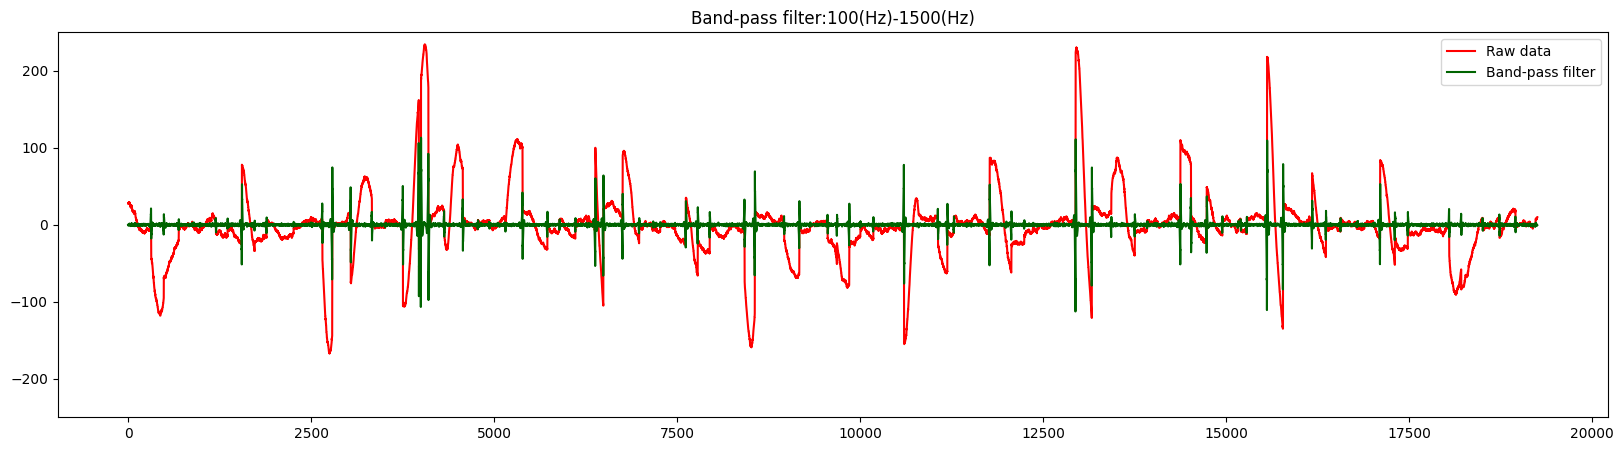

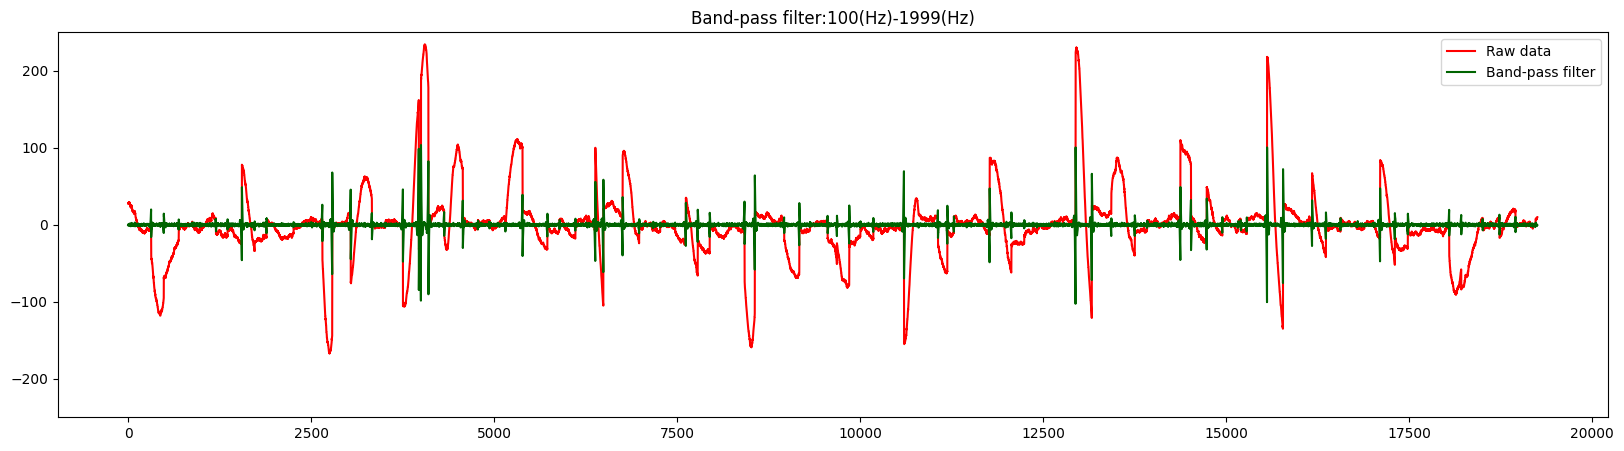

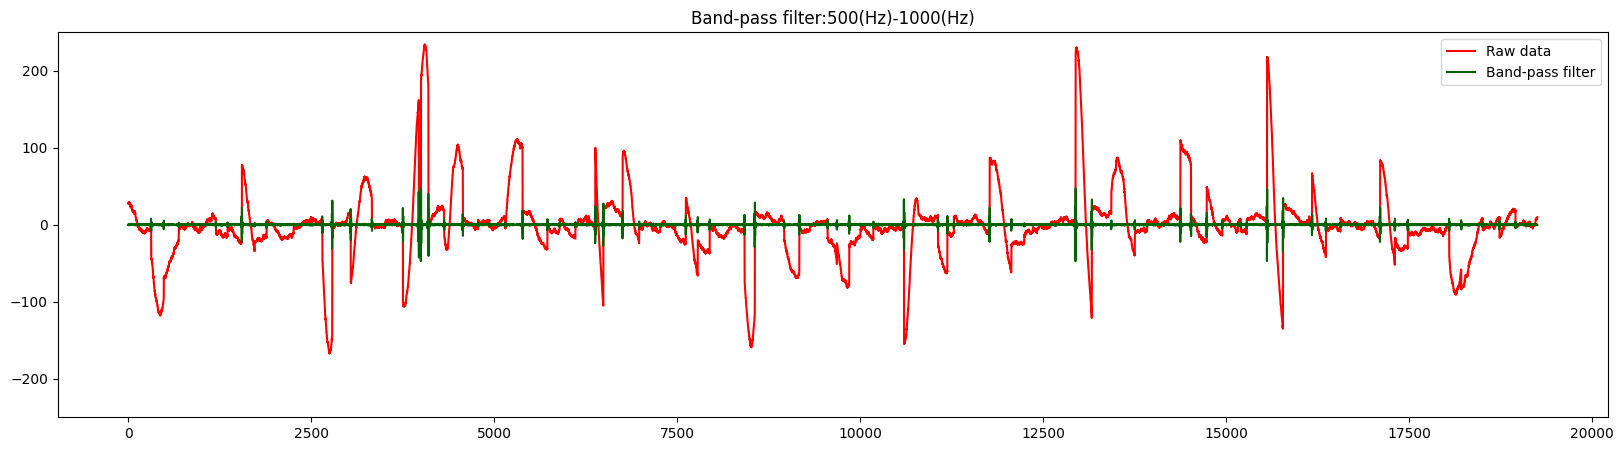

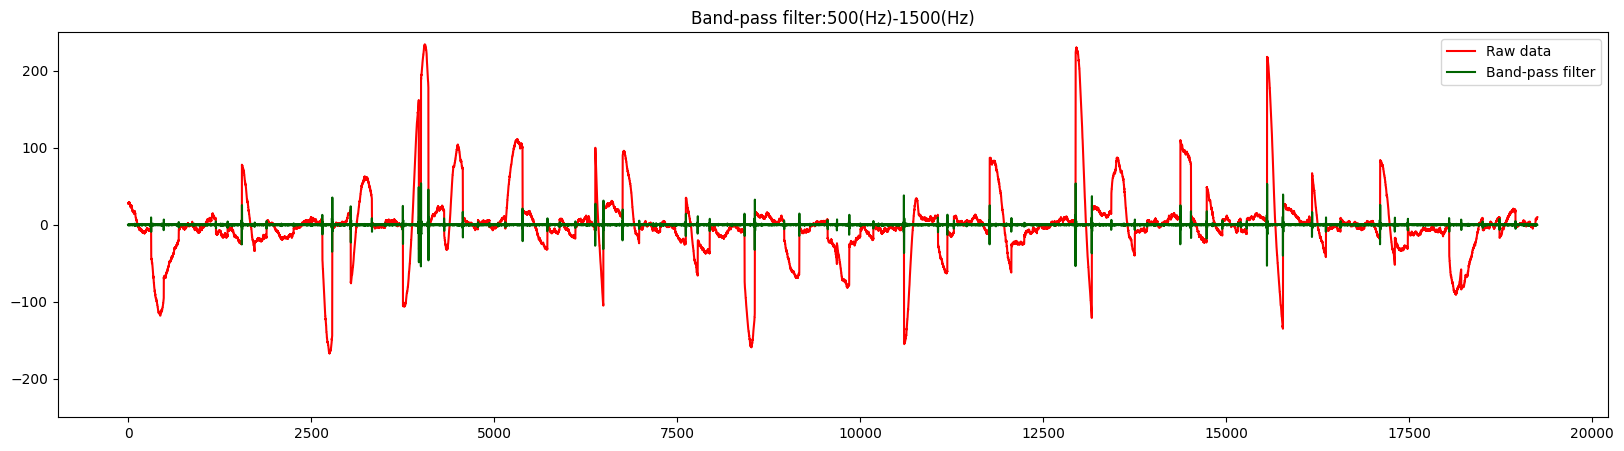

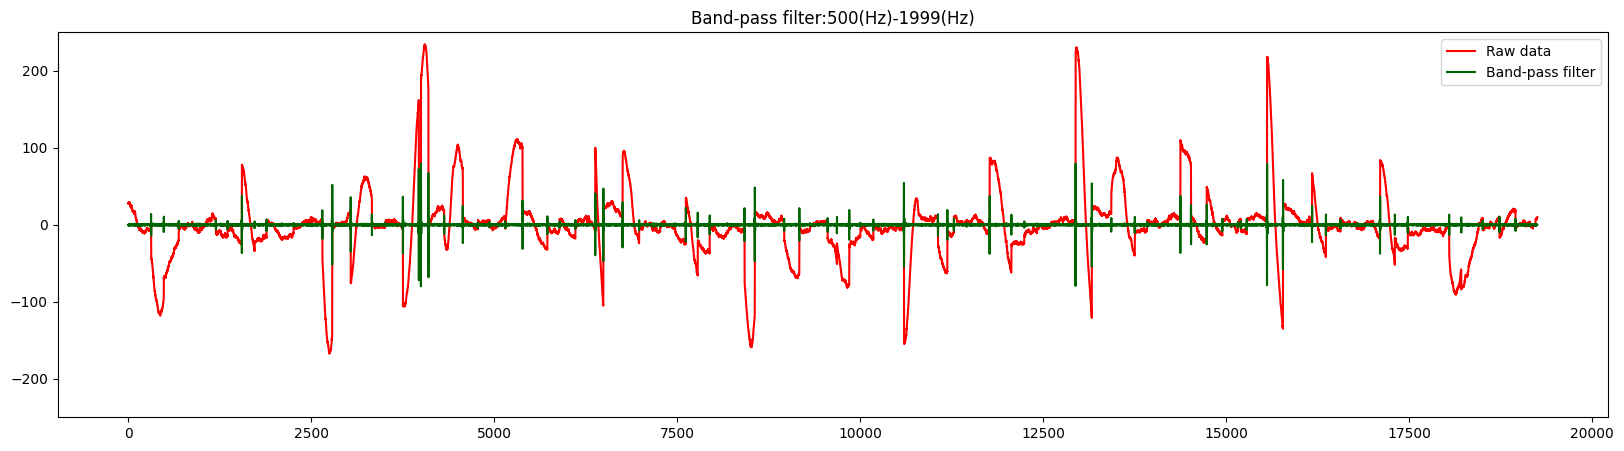

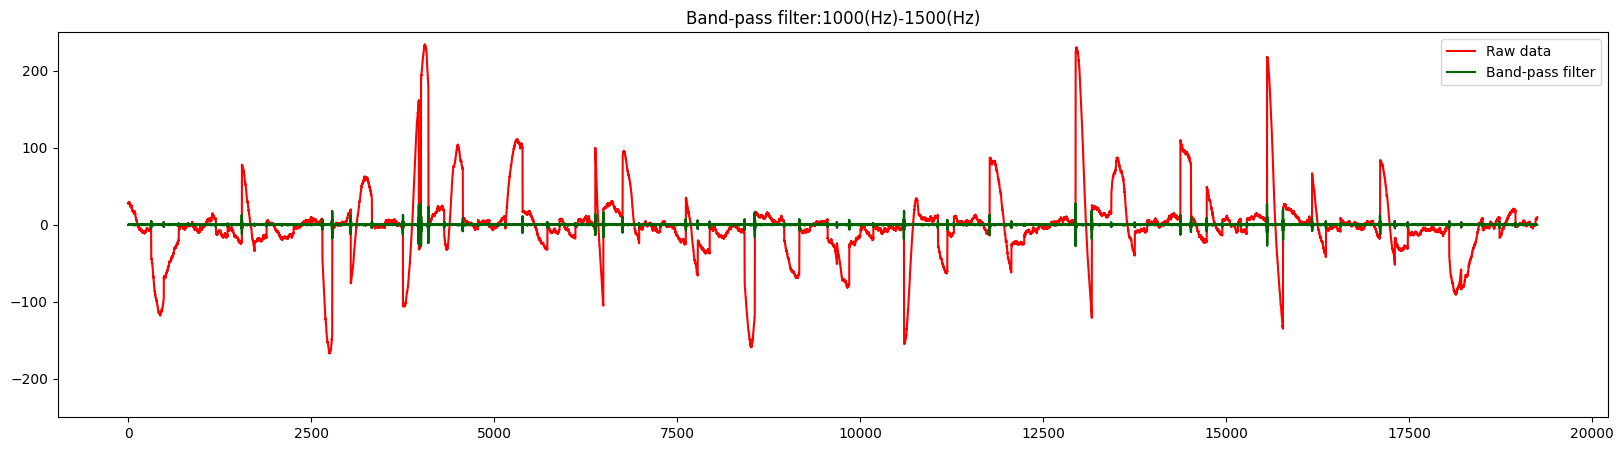

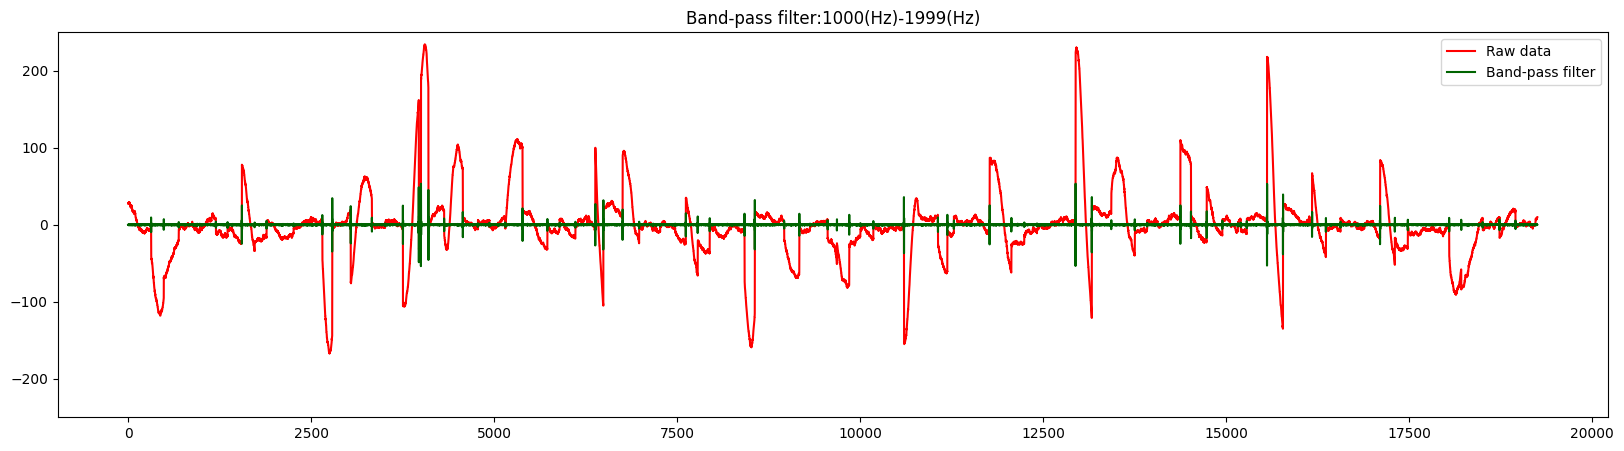

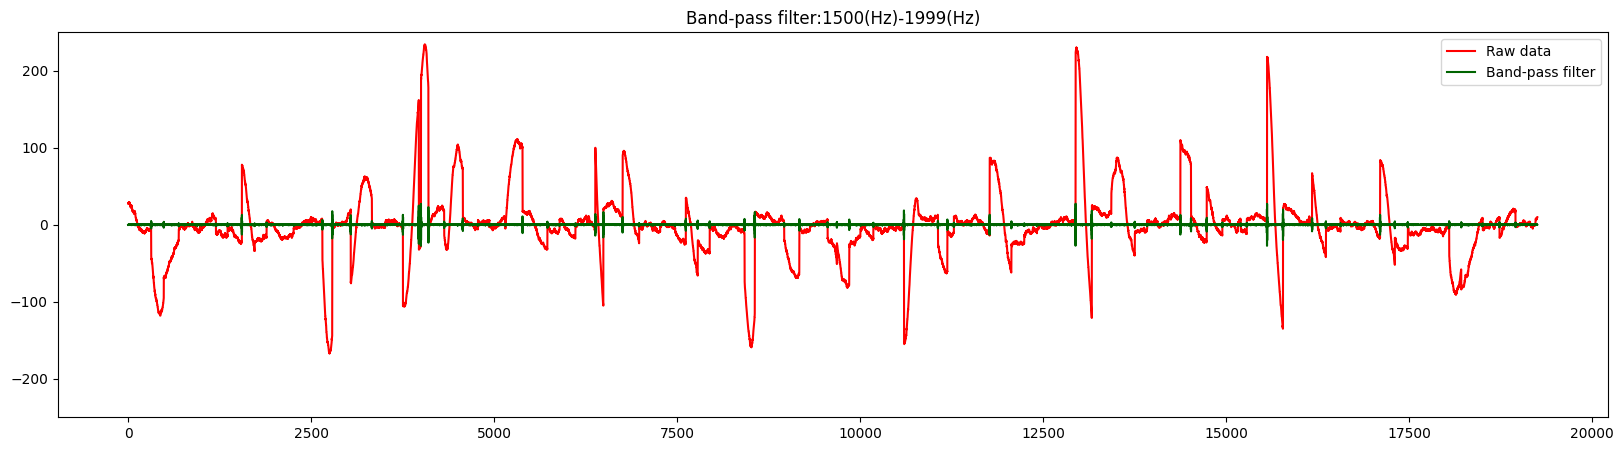

In [241]:
bandpass_filter_per_range_freq("p1", 3, 2000)


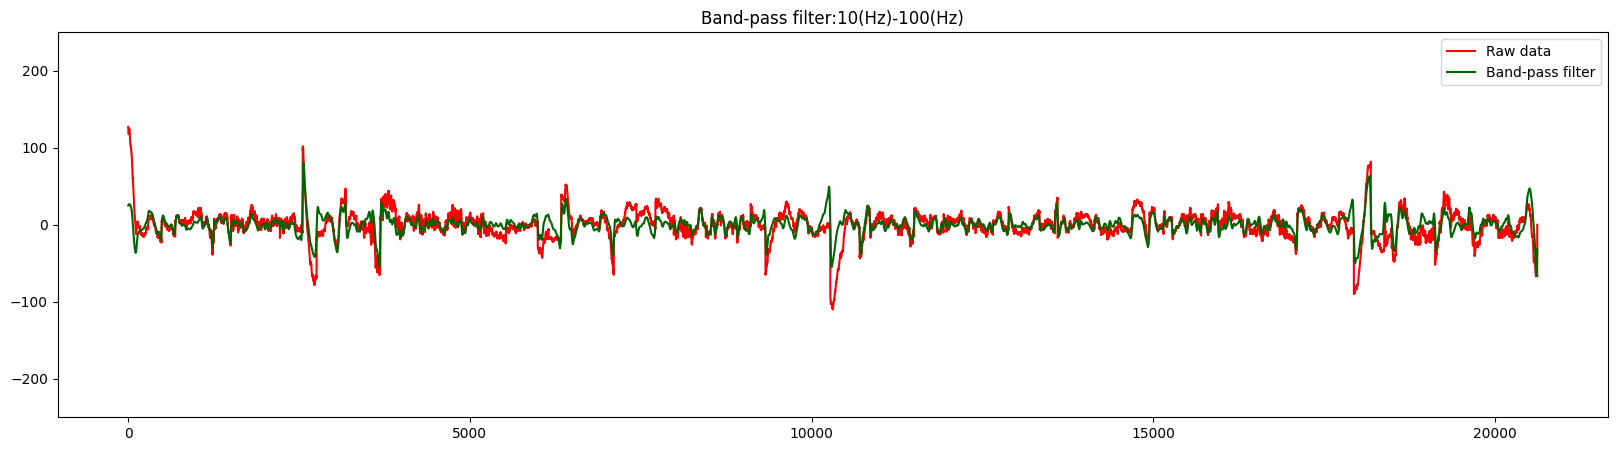

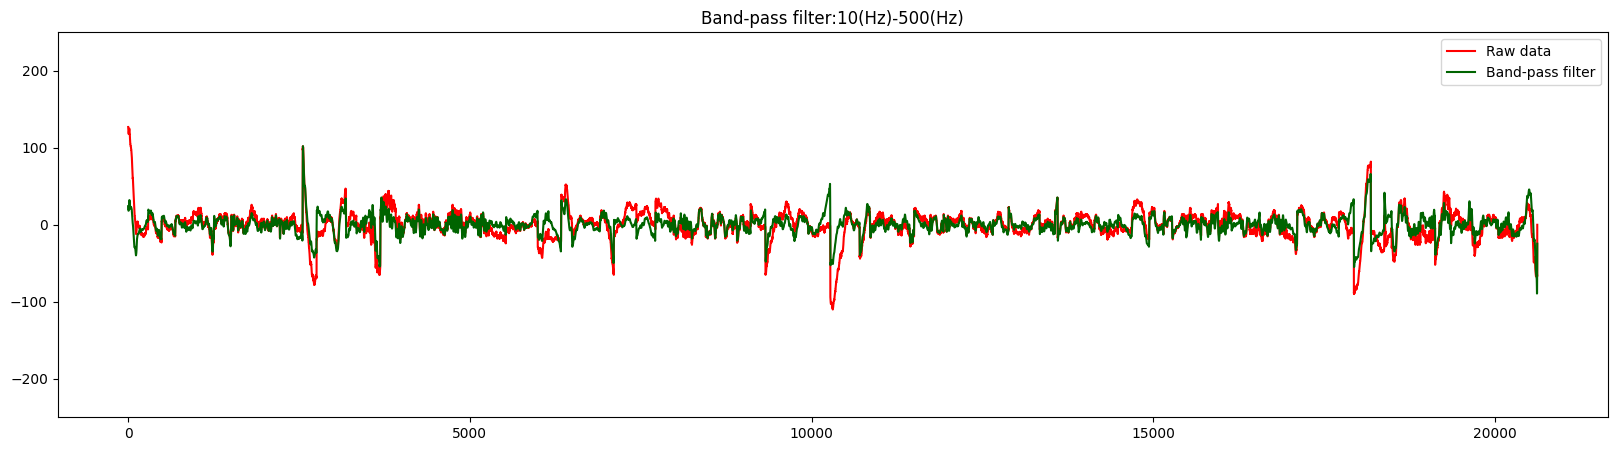

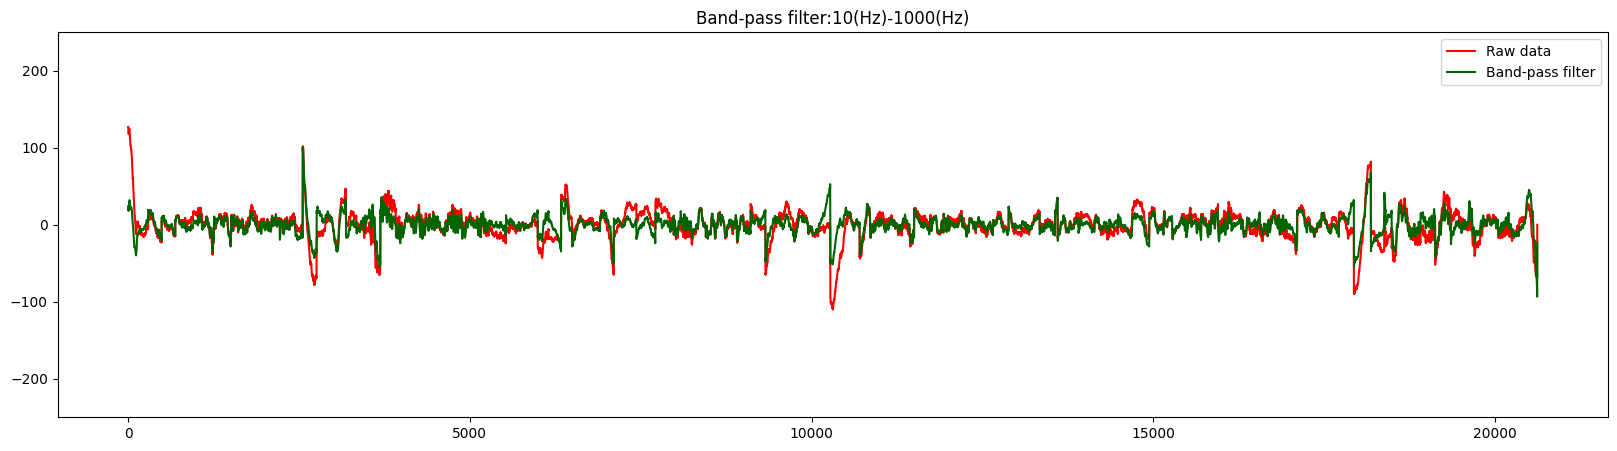

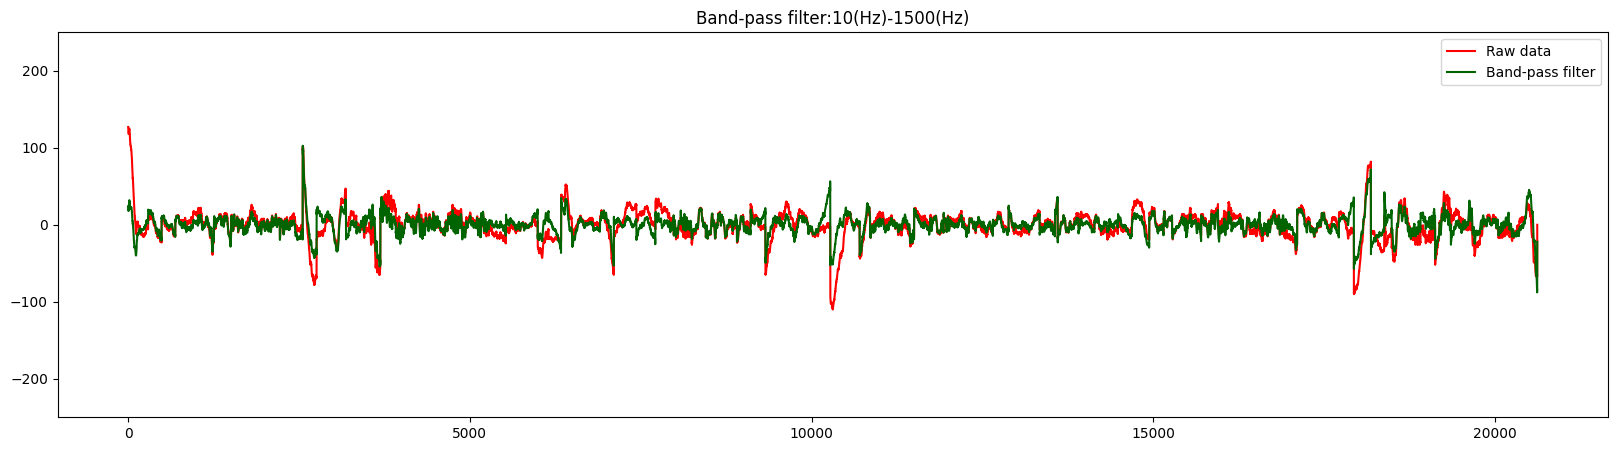

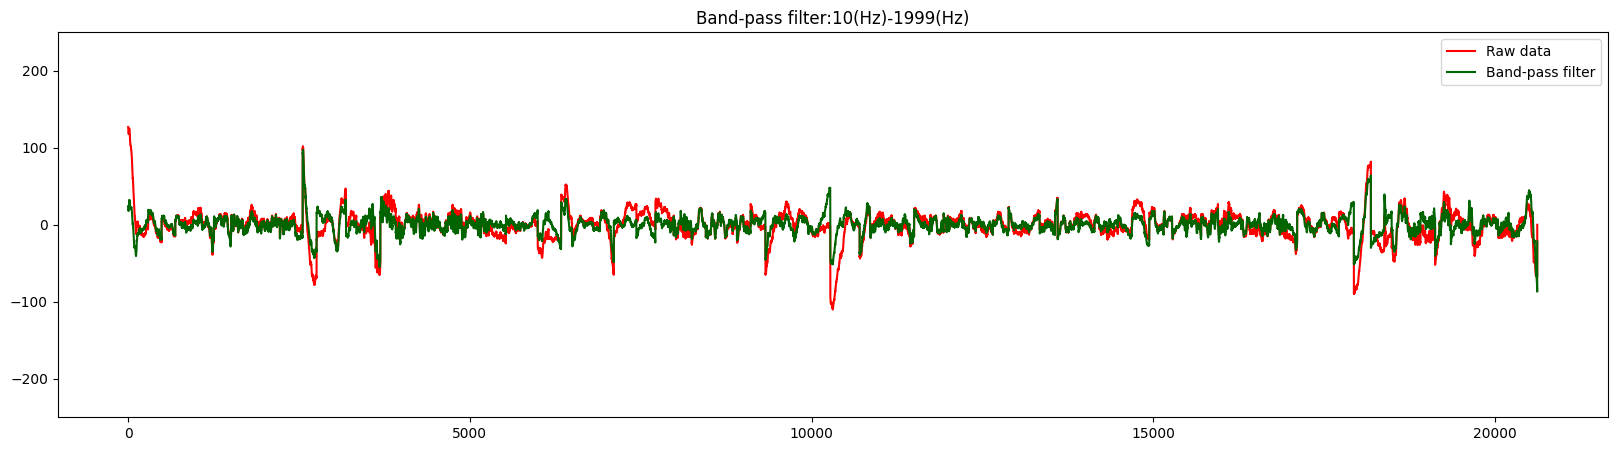

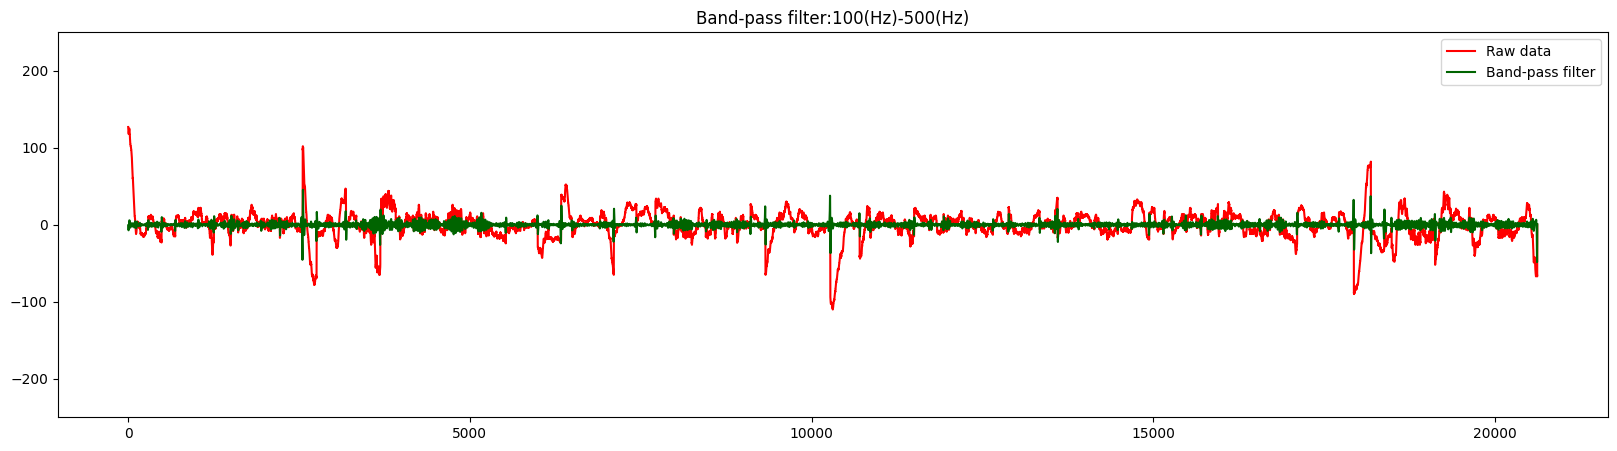

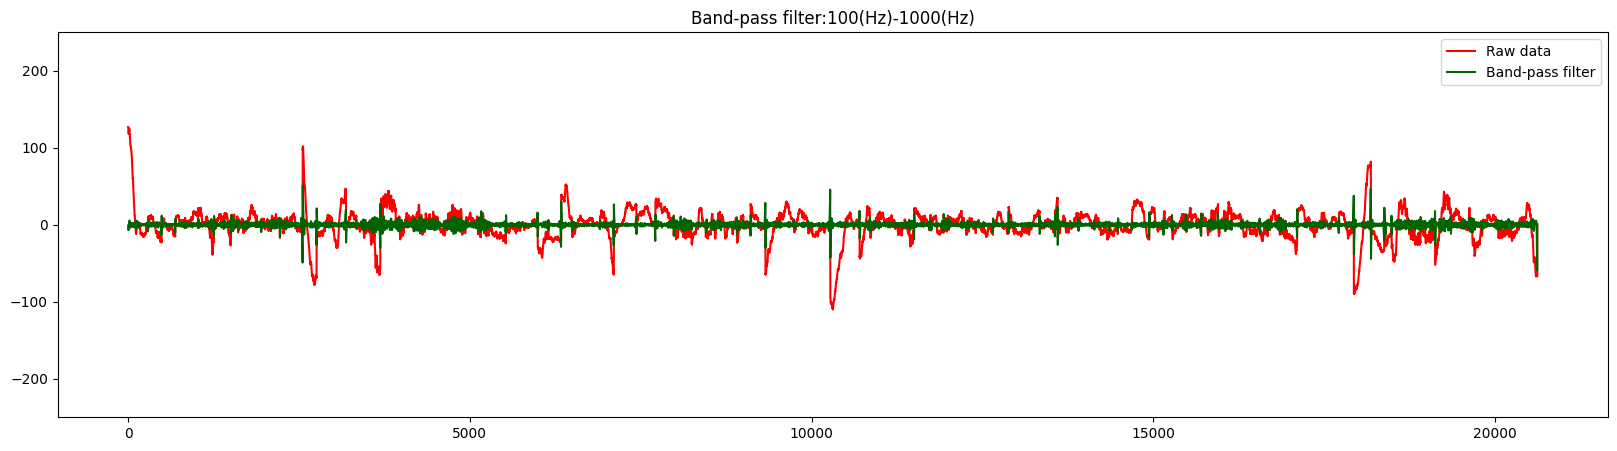

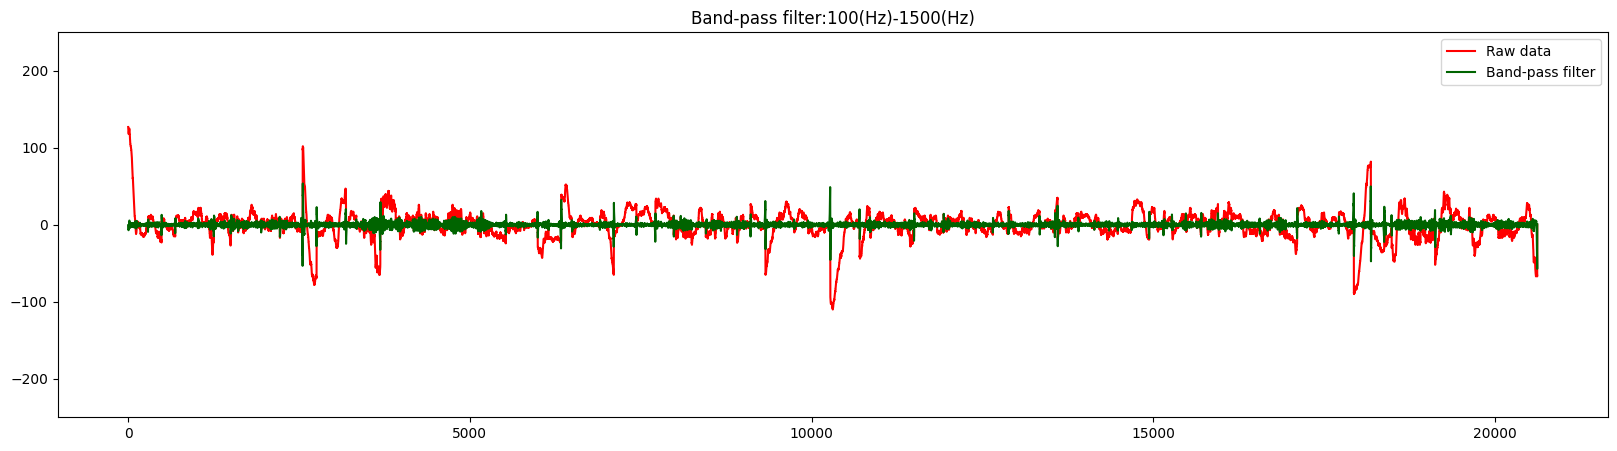

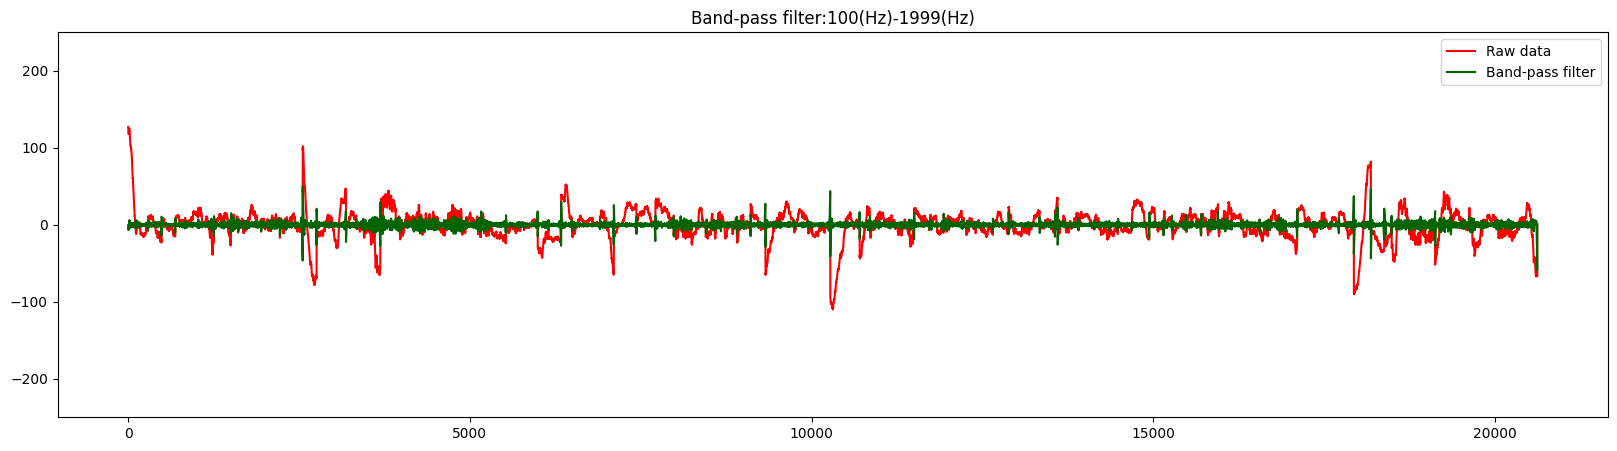

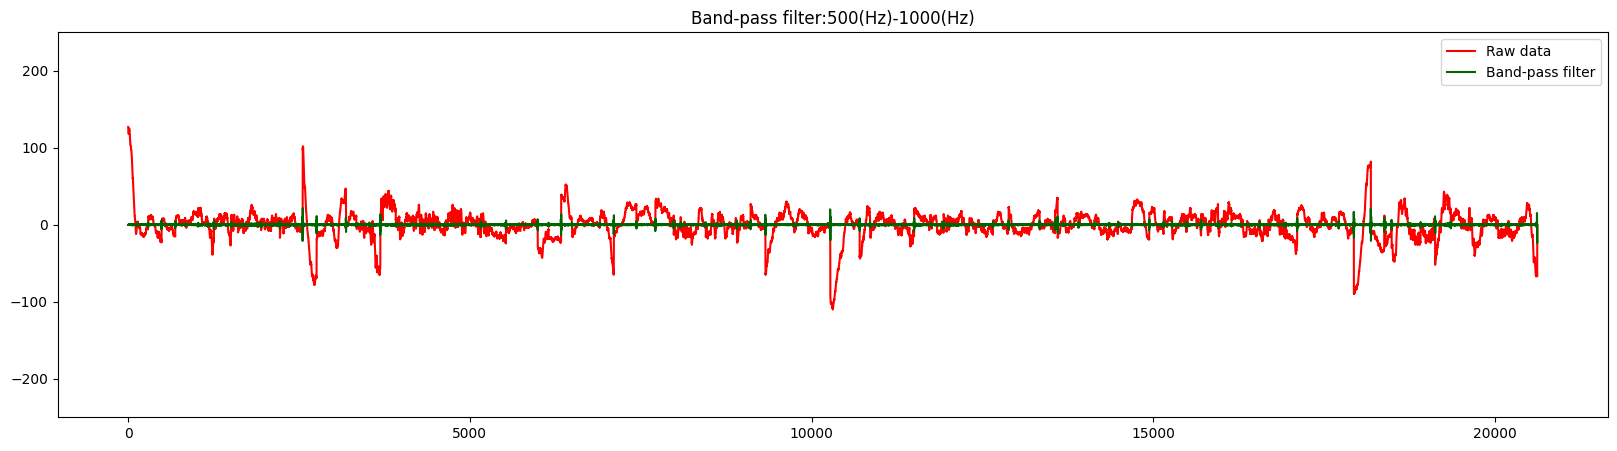

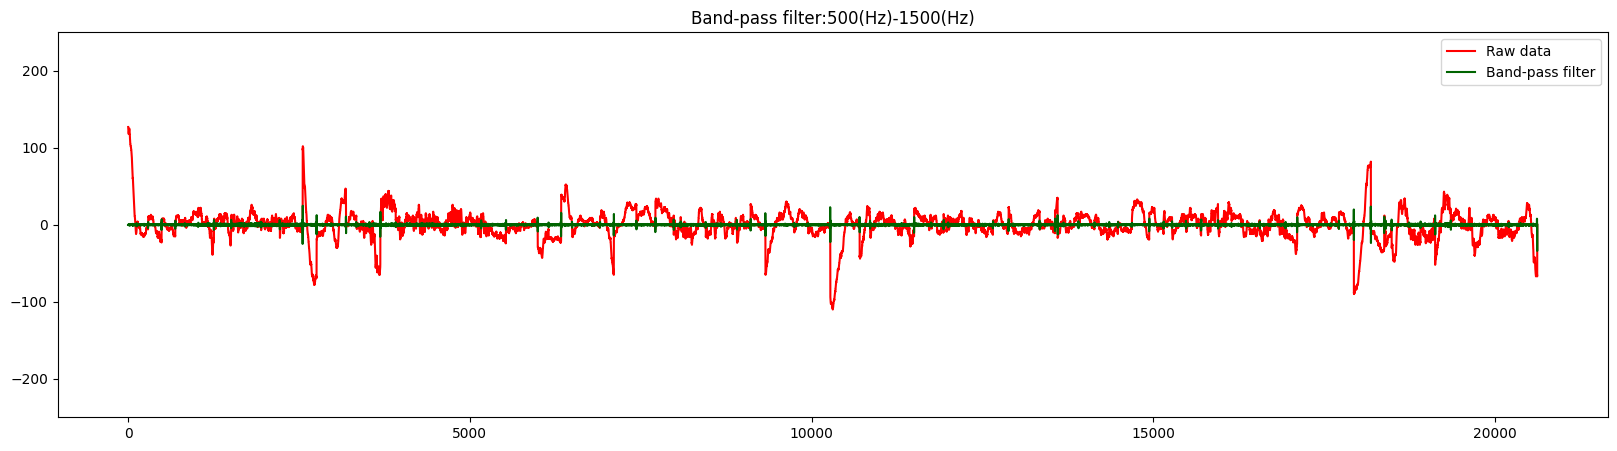

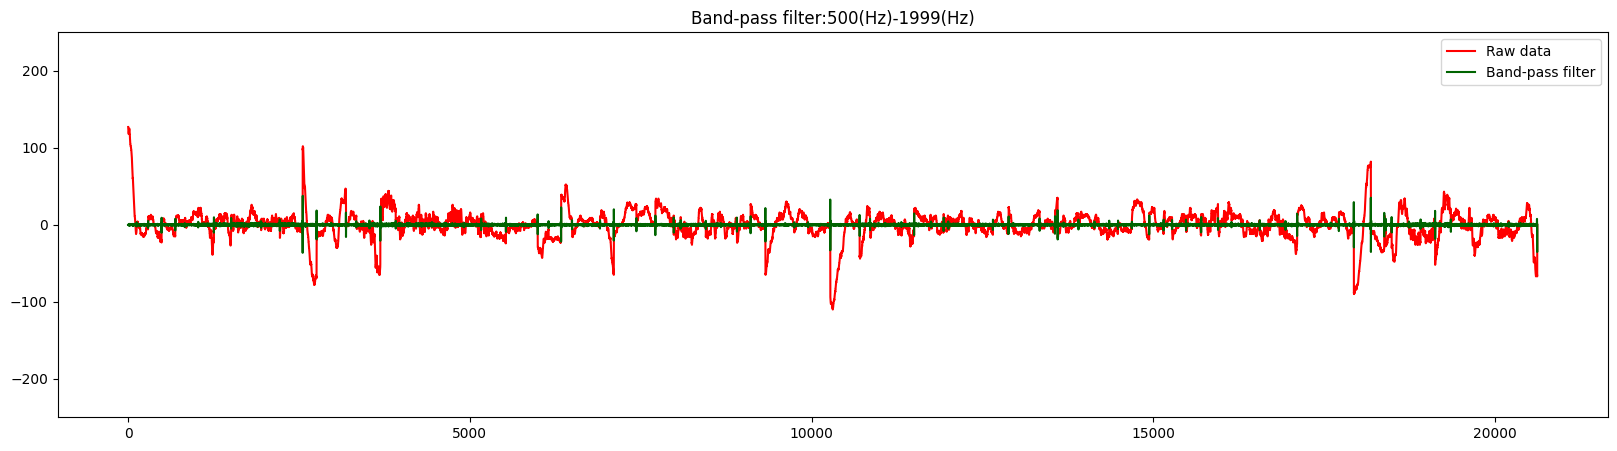

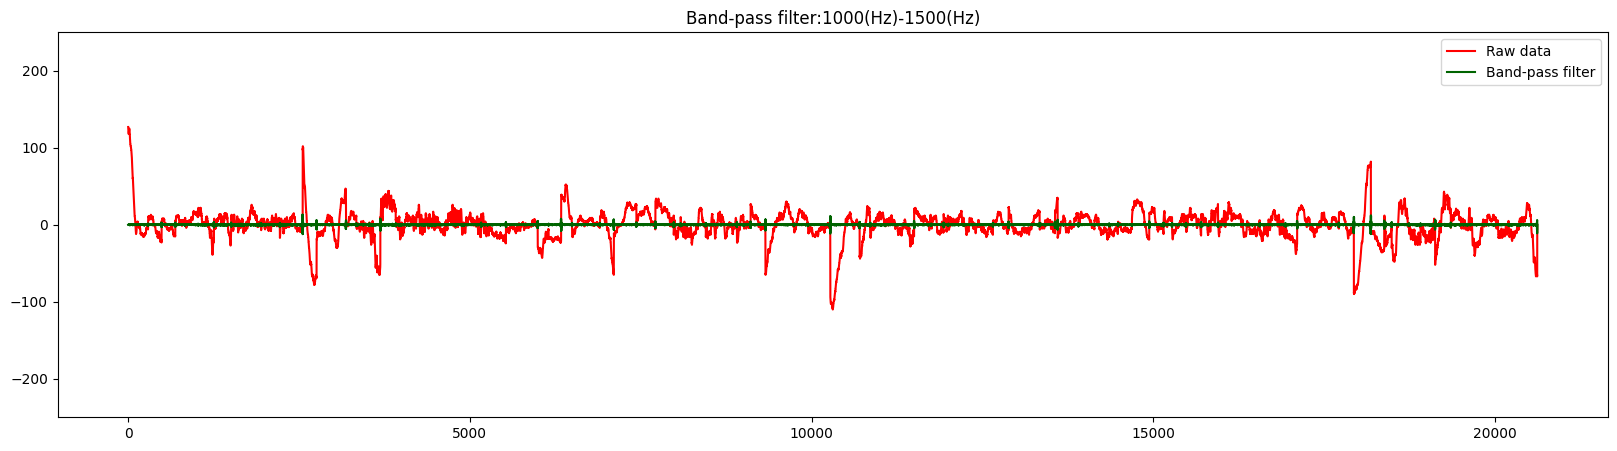

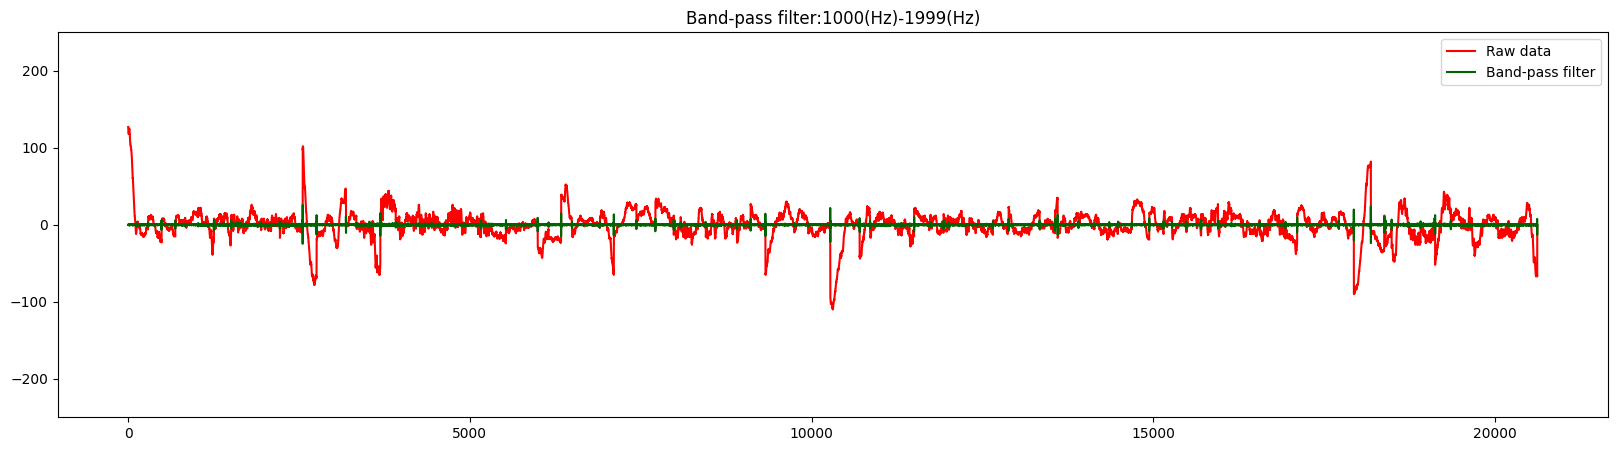

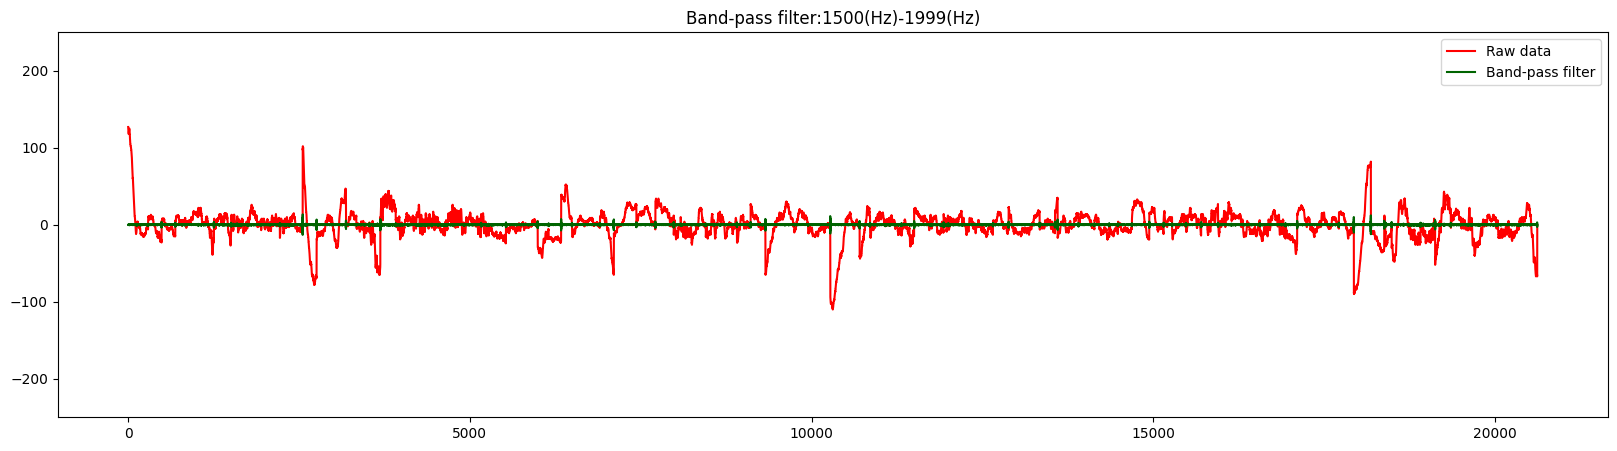

In [238]:
bandpass_filter_per_range_freq("s1", 3, 2000)
    

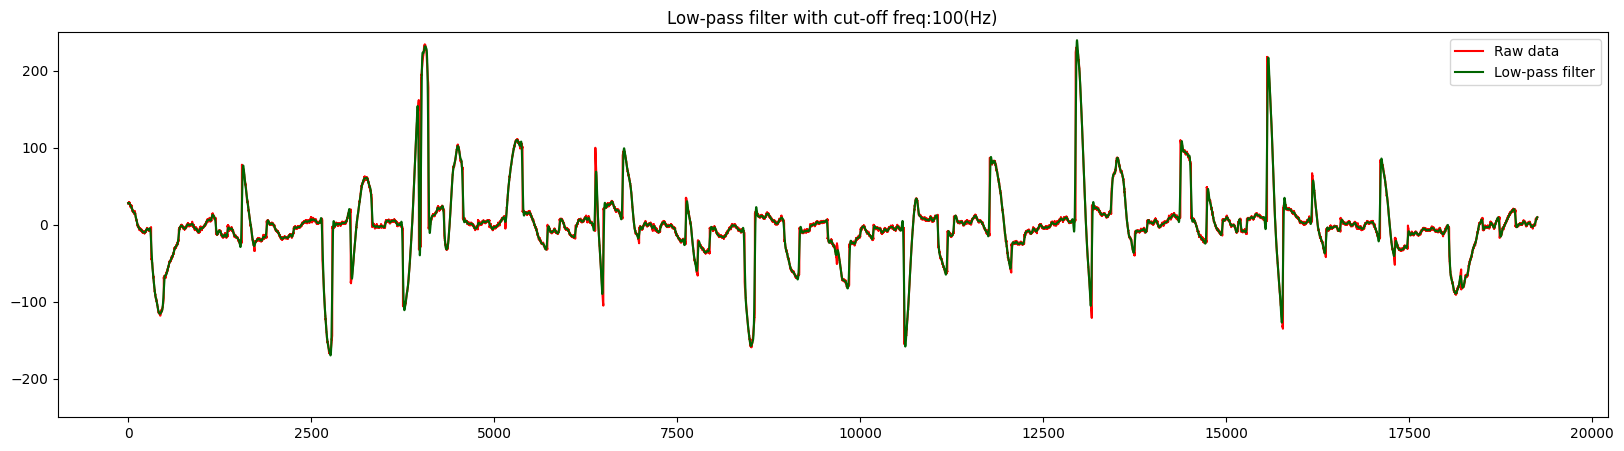

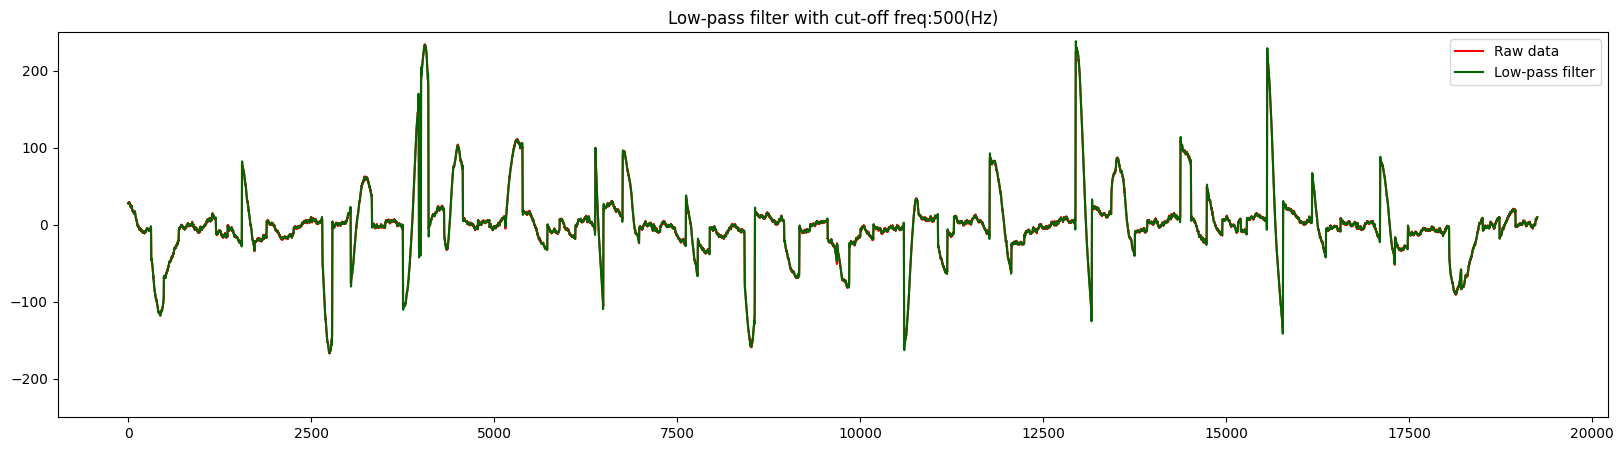

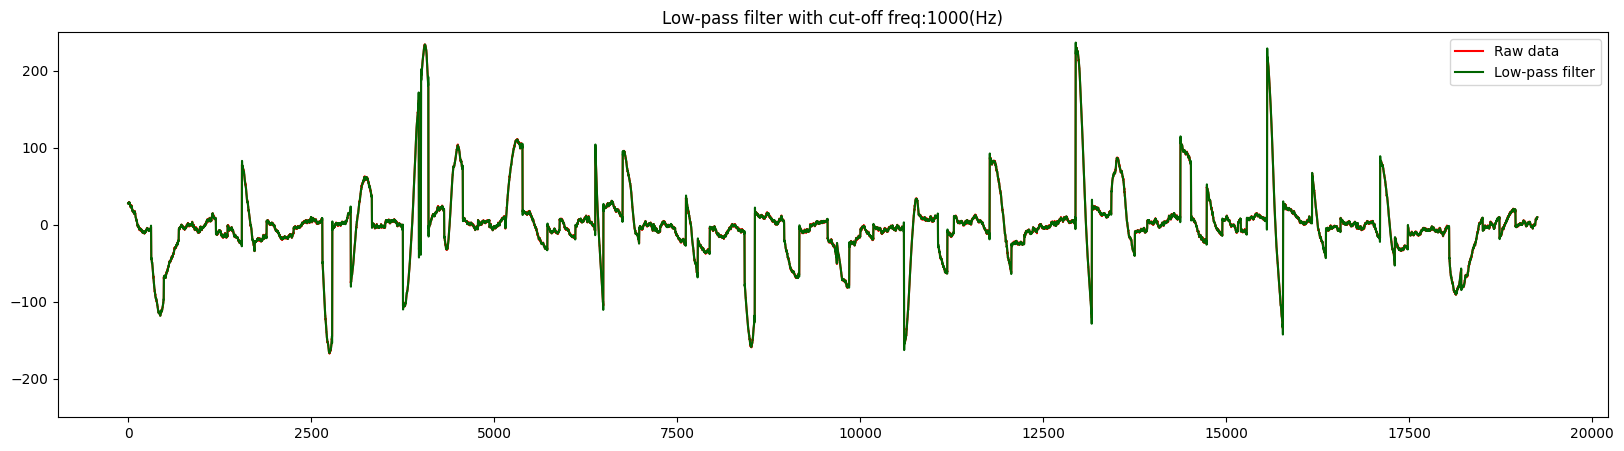

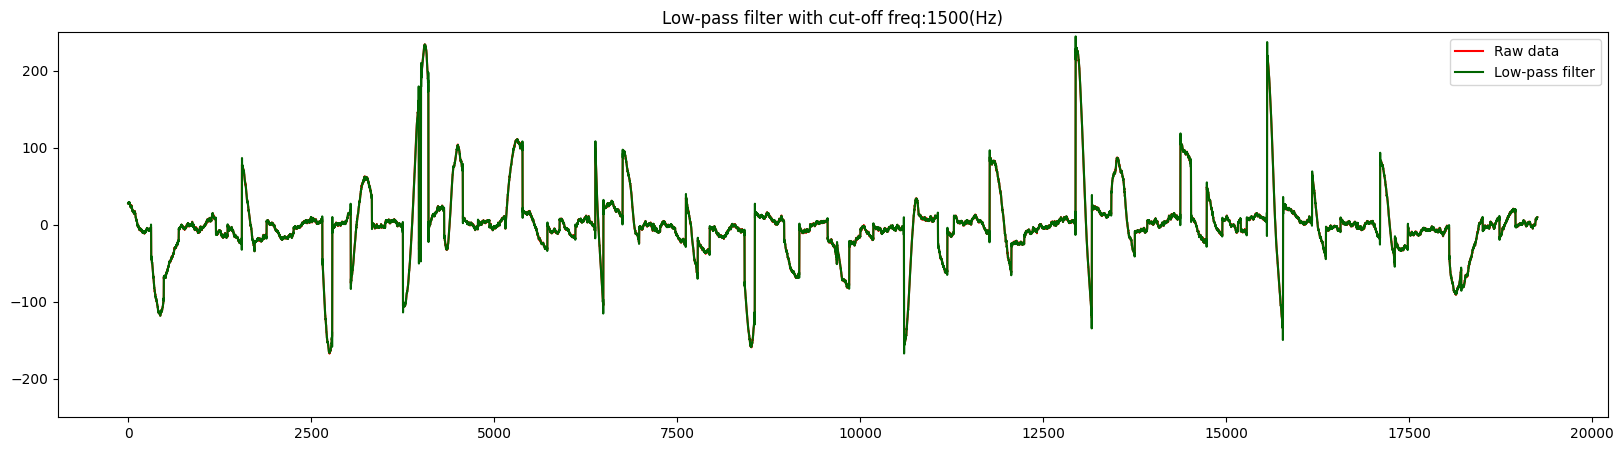

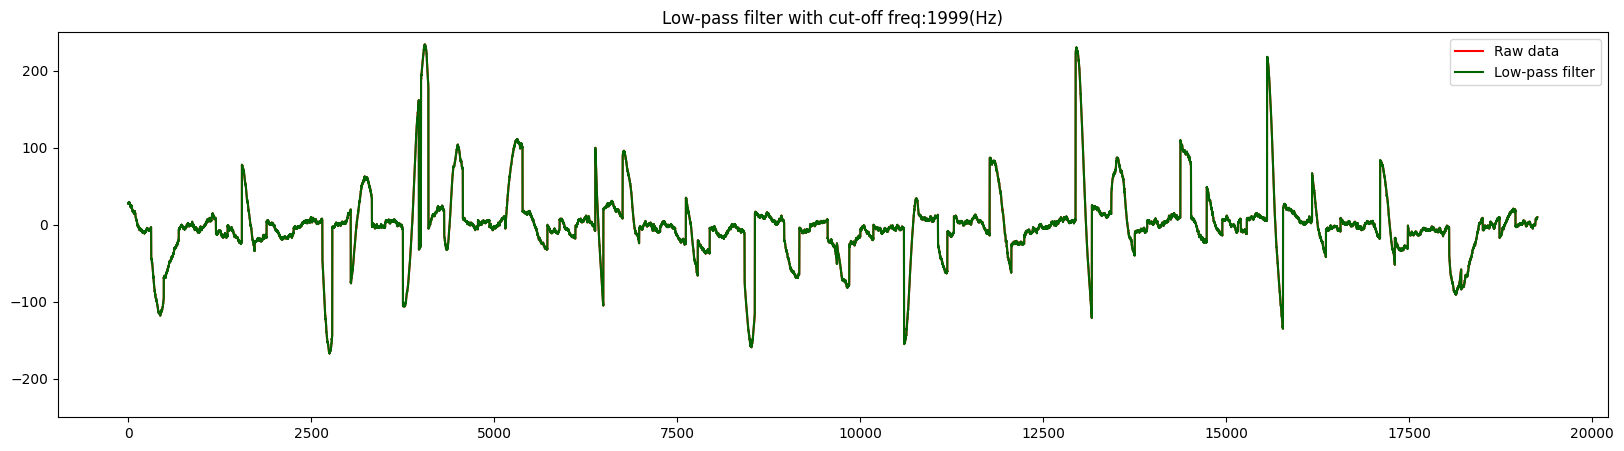

In [239]:
lowpass_filter_per_cutoff_freq("p1", 3, 2000)

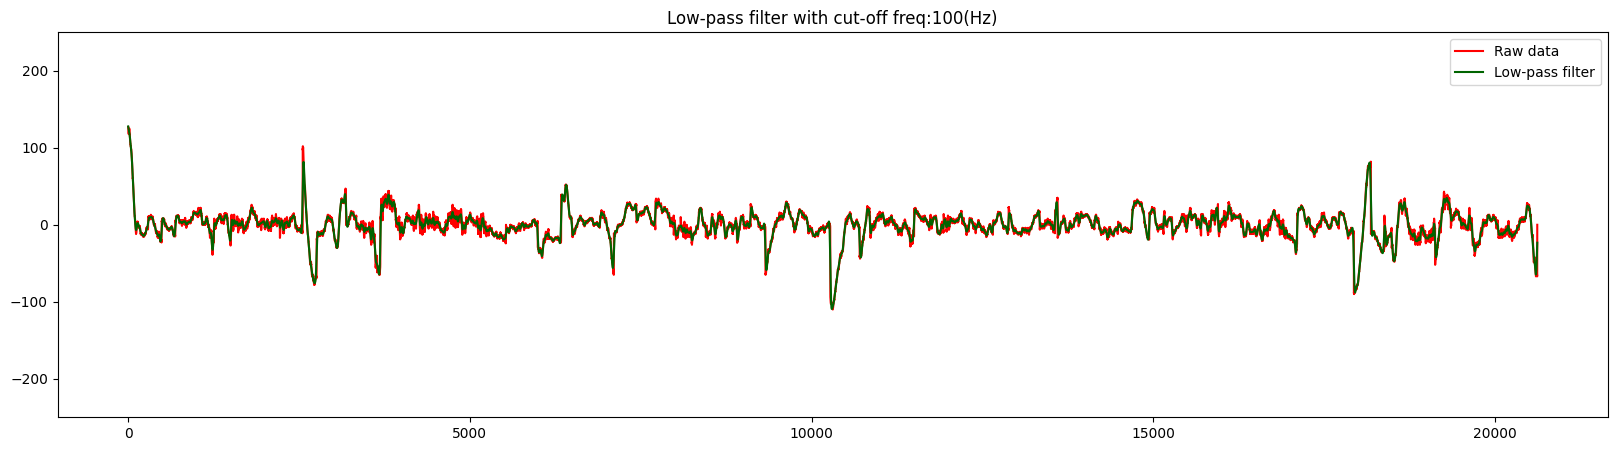

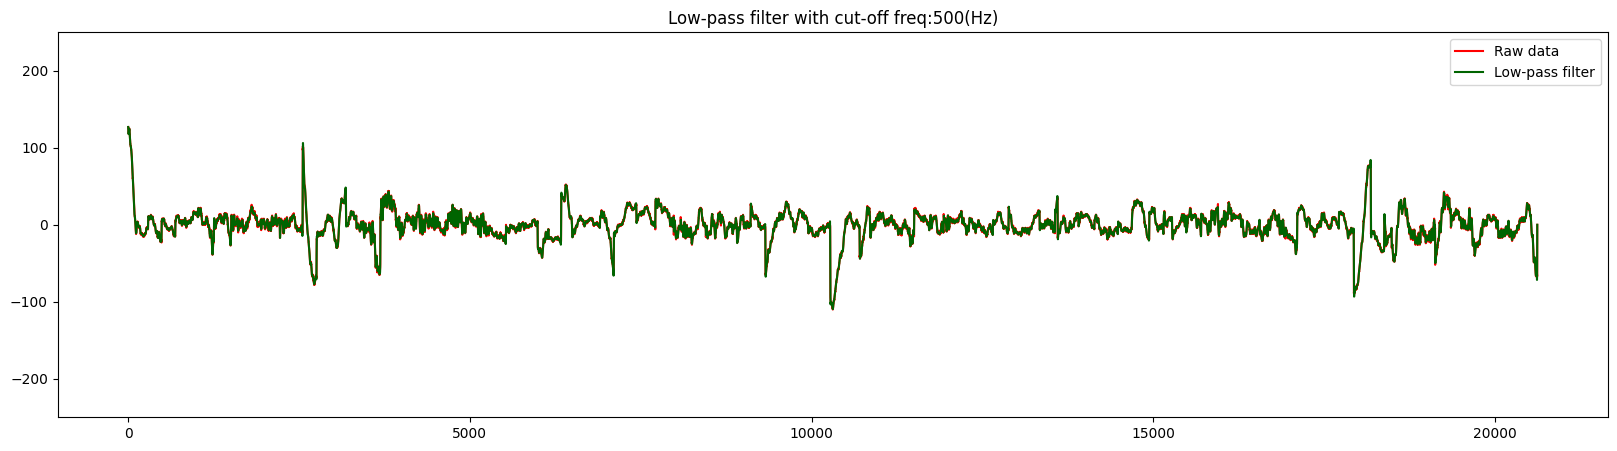

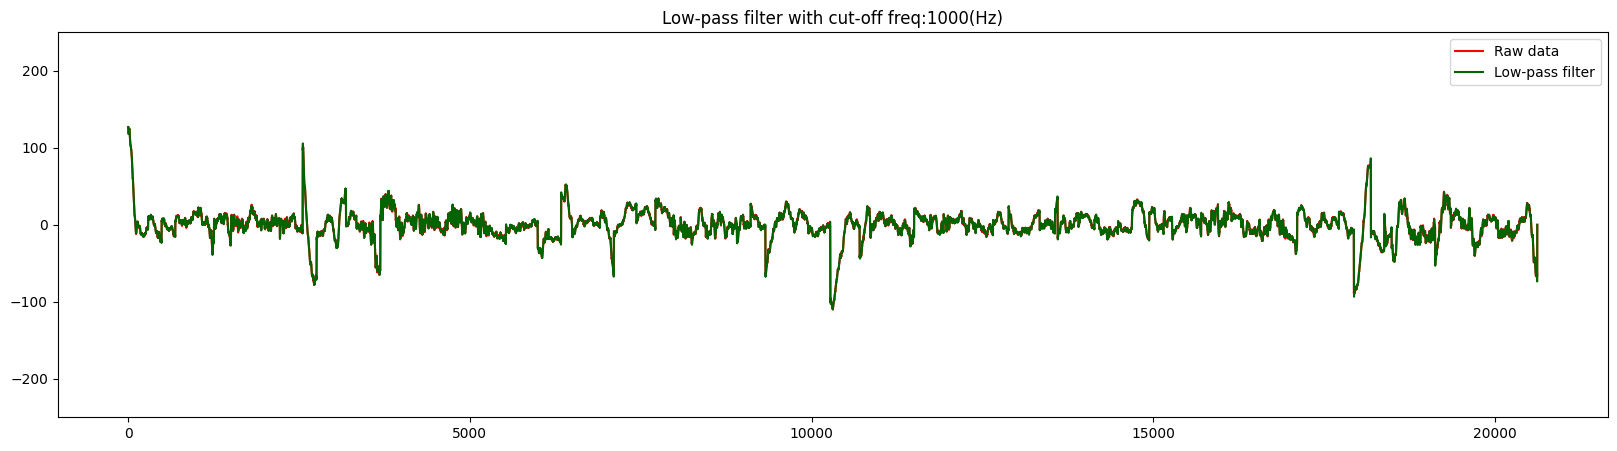

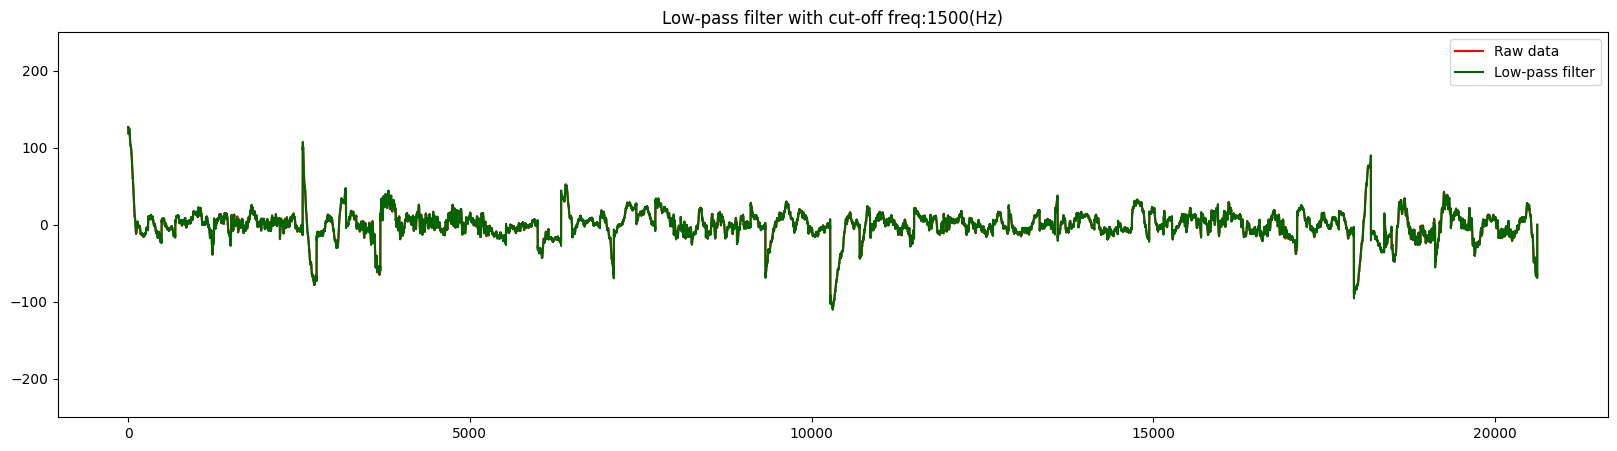

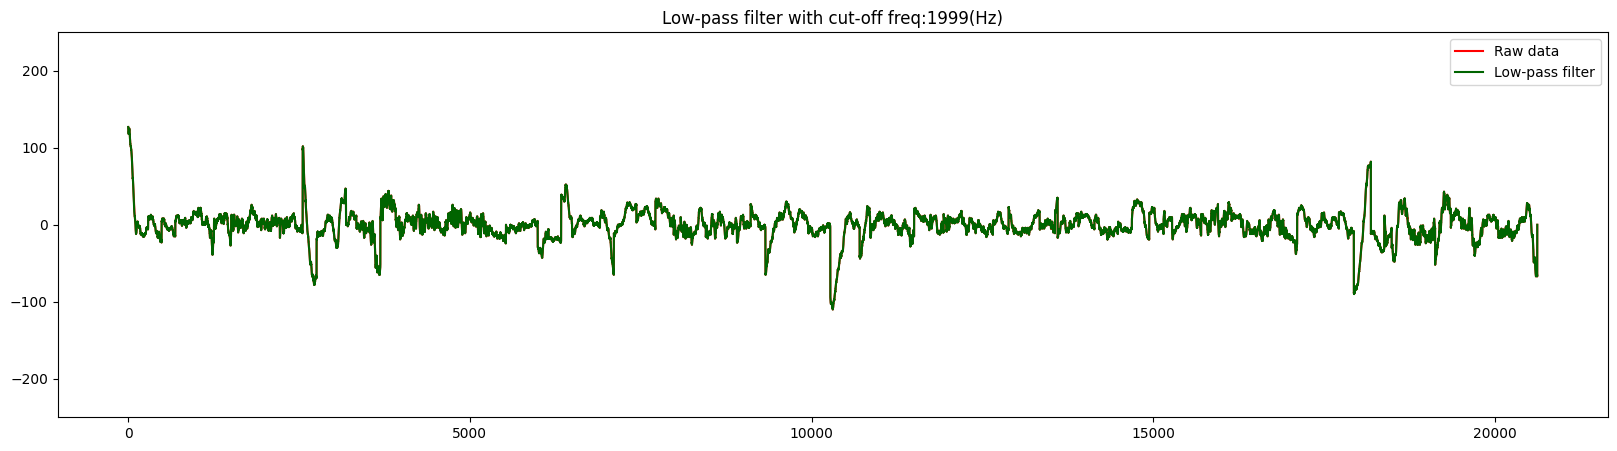

In [240]:
lowpass_filter_per_cutoff_freq("s1", 3, 2000)

3240


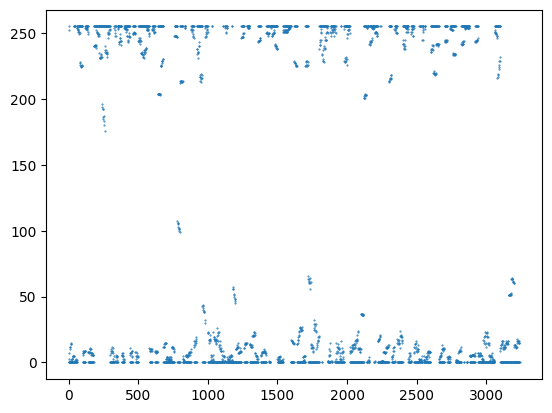

In [217]:
print(len(preprocessing_data("s16")))
plt.scatter(np.arange(len(preprocessing_data("s16"))),preprocessing_data("s16"), s = 0.2)